# Q.7

### See this lecture (upto slide 14) https://developers.google.com/machine-learning/crash-course/classification/video-lecture. Design a bayes classifier (optimal) when p0 = 0.95. Also class conditional densities for class 0 is normal mean 0 and variance 1. For class 1, class conditional density is mean 1 and variance 1.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm # library, which provides a progress bar that shows the progress of the loop

### Creating parameters for class 0 and class 1 with the parameters as per given in the question

In [3]:
parameters0 = {'mean': 0, 'variance': 1, 'prior': 0.95}
parameters1 = {'mean': 1, 'variance': 1, 'prior': 0.05}

### Plot the PDFs for Class 0 and Class 1

In [4]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

### Simulating Normal Distributions with Different Parameters

In [5]:
X = np.random.normal(loc=parameters0['mean'], scale=np.sqrt(parameters0['variance']), size=100)
Y = np.random.normal(loc=parameters1['mean'], scale=np.sqrt(parameters1['variance']), size=100)


### Plotting Normal Probability Density Functions for Two Classes

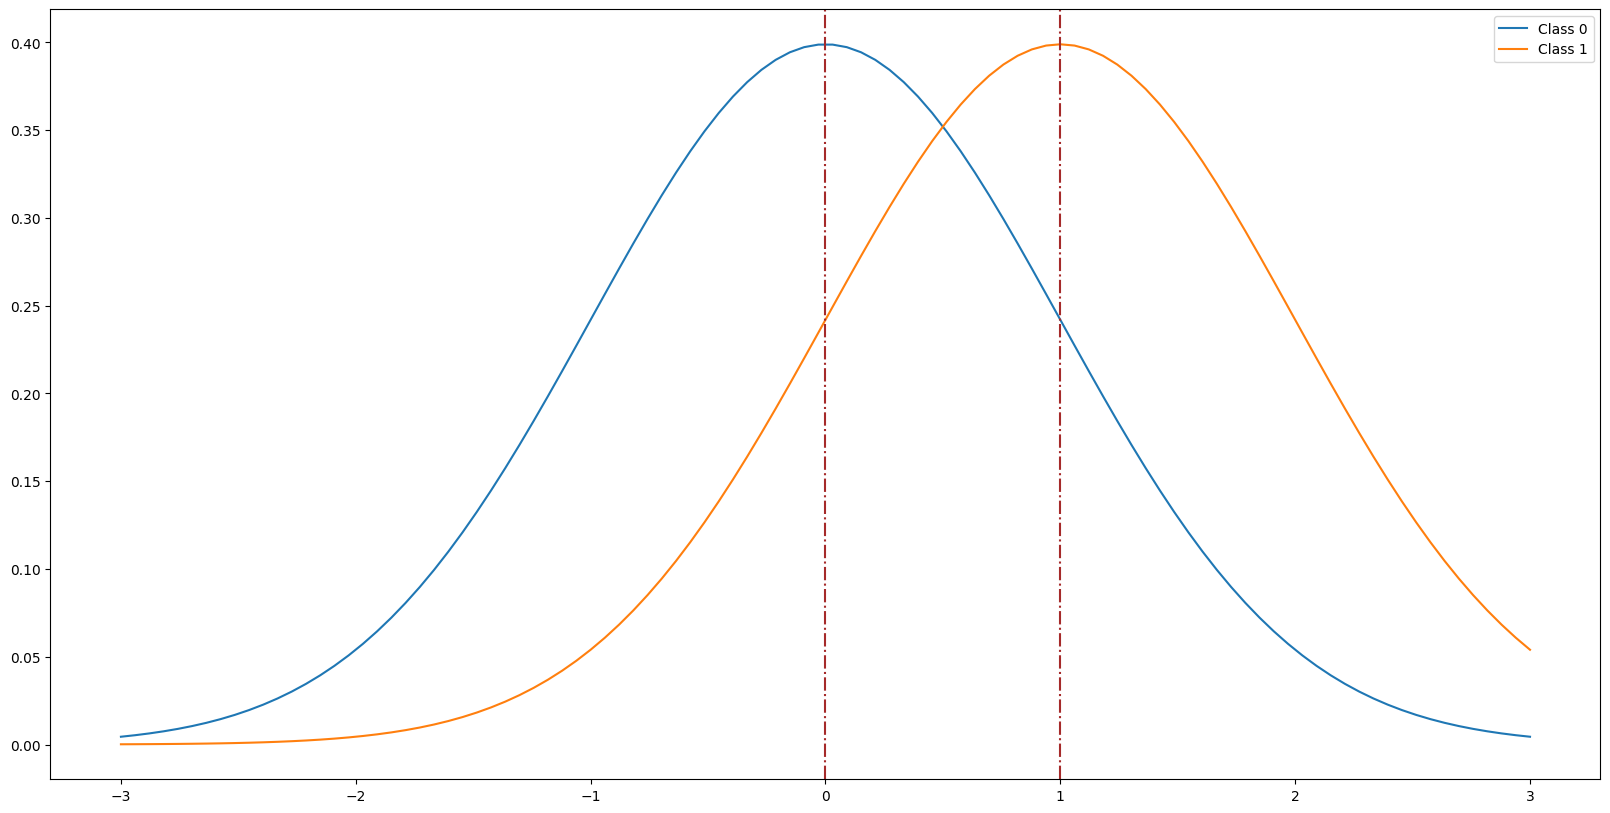

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance']))
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance']))
# draw a vertical line at means of class 0 and class 1
plt.axvline(x=parameters0['mean'], color='brown', linestyle='dashdot')
plt.axvline(x=parameters1['mean'], color='brown', linestyle='dashdot')
plt.legend(['Class 0', 'Class 1'])
plt.show()

### Plotting Prior-Weighted Normal Probability Density Functions for Two Classes





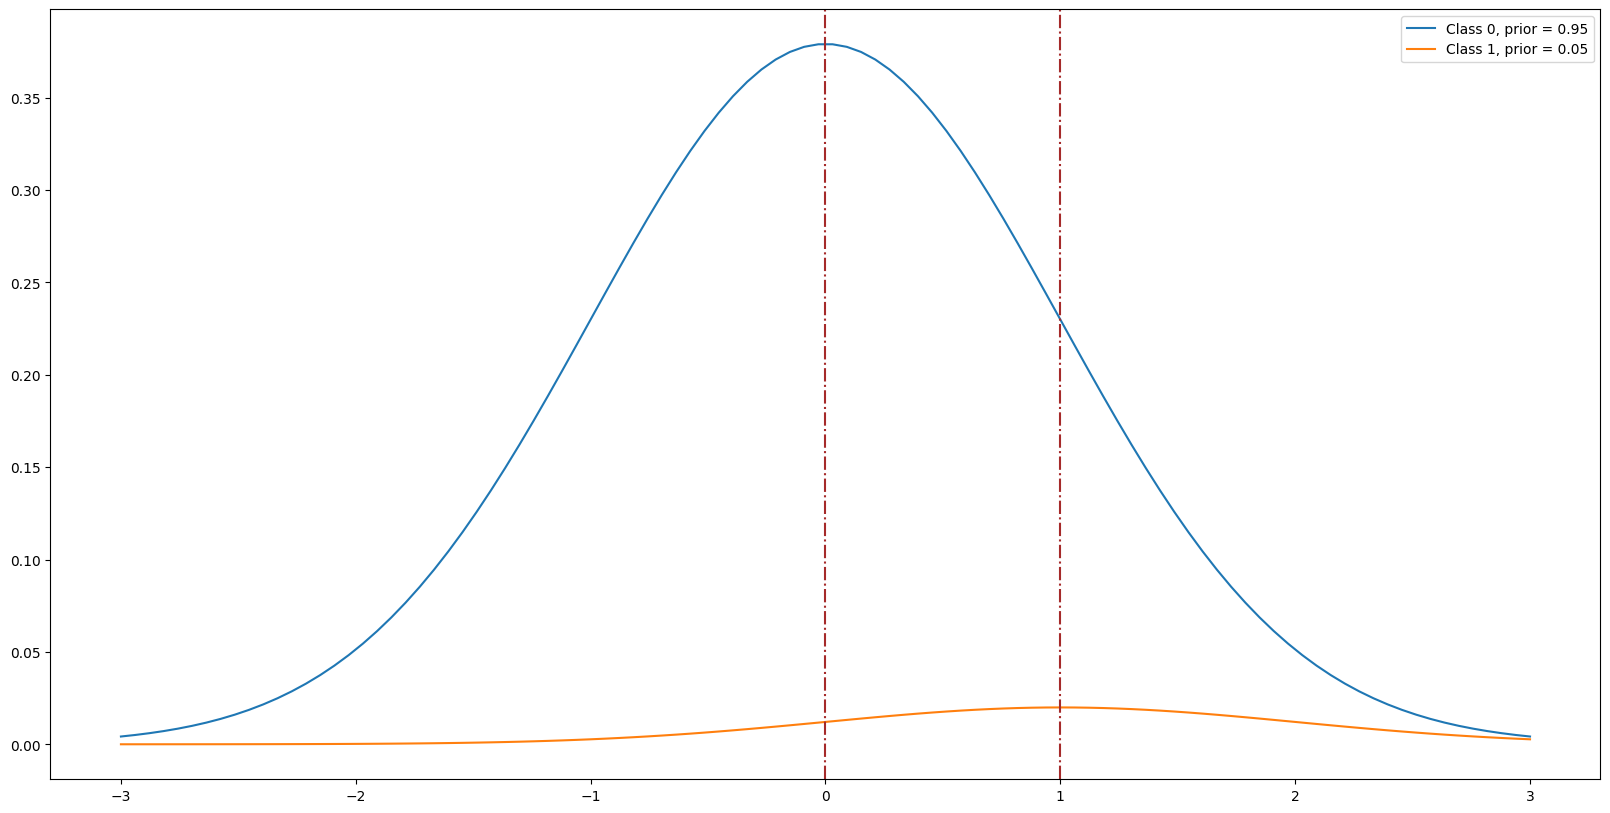

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])
                   ) / np.sqrt(2 * np.pi * parameters0['variance']) * parameters0['prior'])
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])
                   ) / np.sqrt(2 * np.pi * parameters1['variance']) * parameters1['prior'])
plt.axvline(x=parameters0['mean'], color='brown', linestyle='dashdot')
plt.axvline(x=parameters1['mean'], color='brown', linestyle='dashdot')
plt.legend(['Class 0, prior = ' + str(parameters0['prior']),
           'Class 1, prior = ' + str(parameters1['prior'])])
plt.show()

### Generate Sample Data Points for Class 0 and Class 1

In [8]:
def sample_standard_normal():
    return np.random.randn()

### Generating Synthetic Data Points for Two Classes Using Normal Distribution

In [9]:
# Generate data points for class 0 and 1
# Set the sample size
n_samples = 50000

# Generate standard normal data
X = np.random.normal(size=2 * n_samples)

# If the random number is less than the prior probability of class 0,
# assign the data point to class 0 and generate the corresponding value
# for the feature based on the parameters of class 0.
sample = np.zeros((2 * n_samples, 2))
for i in range(len(X)):
    toss = np.random.random()
    if toss < parameters0['prior']:
        sample[i, 0] = X[i] * \
            np.sqrt(parameters0['variance']) + parameters0['mean']
        sample[i, 1] = 0
# If the random number is greater than or equal to the prior probability of class 0,
# assign the data point to class 1 and generate the corresponding value
# for the feature based on the parameters of class 1.
    else:
        sample[i, 0] = X[i] * \
            np.sqrt(parameters1['variance']) + parameters1['mean']
        sample[i, 1] = 1

# Separate data points by class
x0 = sample[sample[:, 1] == 0, 0]
x1 = sample[sample[:, 1] == 1, 0]

In [10]:
df = pd.DataFrame(sample, columns=['x', 'y'])

### Plot the sample data histograms for class 1 and class 0

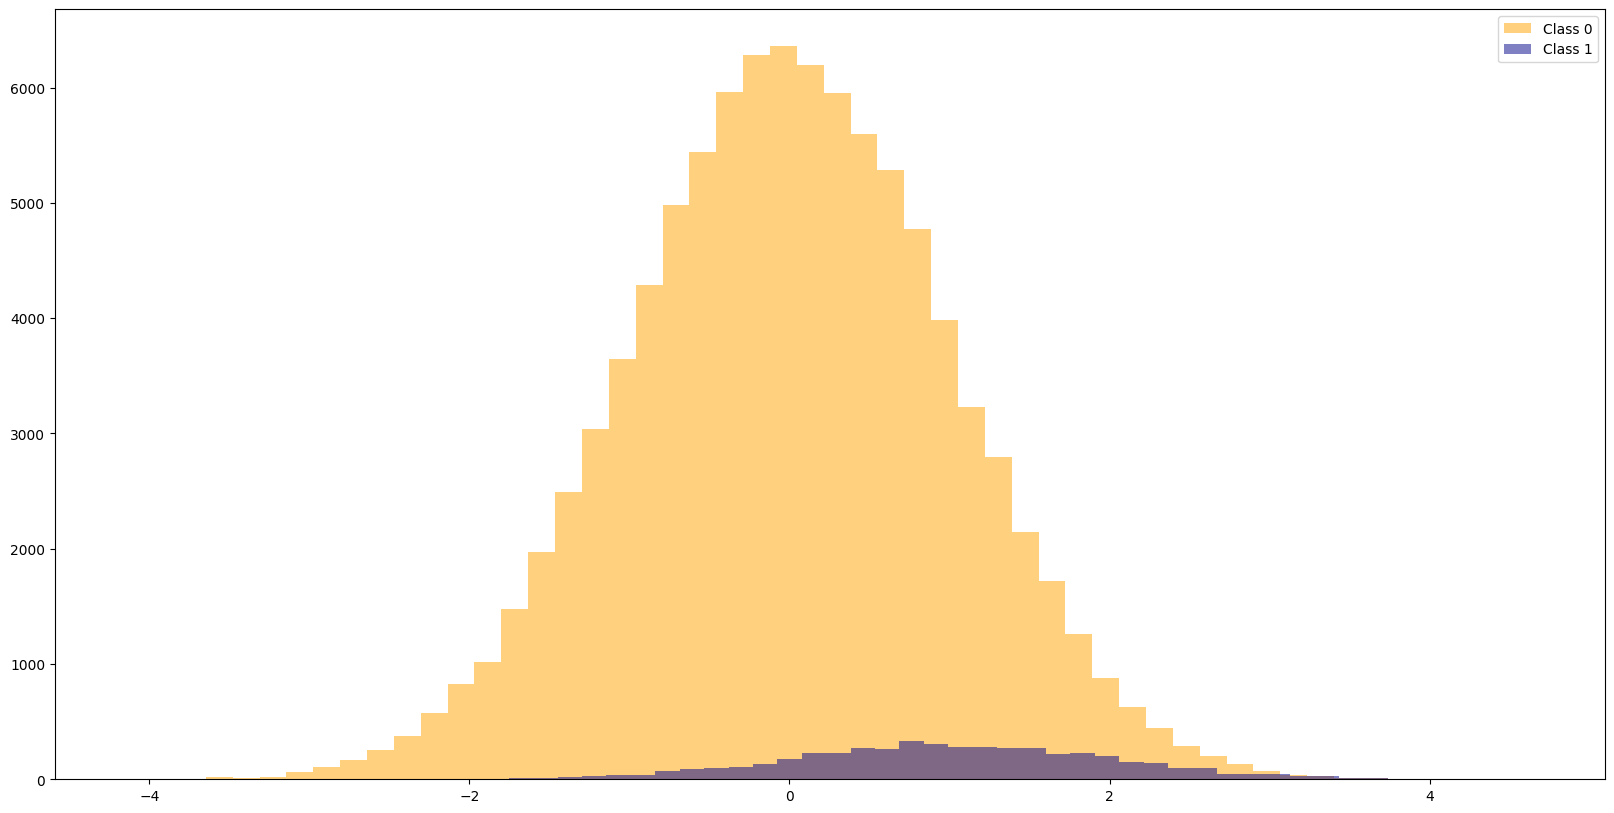

In [11]:
# create a figure with the specified size
plt.figure(figsize=(20, 10))
plt.hist(x0, bins=50, alpha=0.5, label='Class 0', color="orange")
plt.hist(x1, bins=50, alpha=0.5, label='Class 1', color="darkblue")
# add a legend to the plot, showing the labels for the two histograms
plt.legend()
# display the plot
plt.show()


### Bayes Classifier

In [12]:
import numpy as np

def bayes_classifier(x, parameters):
    # extract the parameters for class 0 and class 1
    parameters0 = parameters[0]
    parameters1 = parameters[1]
    
    # calculate the log-likelihoods for class 0 and class 1
    # using the Gaussian distribution formula
    log_likelihood0 = -0.5*np.log(2*np.pi*parameters0['variance']) - (
        x - parameters0['mean'])**2/(2*parameters0['variance'])
    
    log_likelihood1 = -0.5*np.log(2*np.pi*parameters1['variance']) - (
        x - parameters1['mean'])**2/(2*parameters1['variance'])
   
    # calculate the log-posteriors for class 0 and class 1
    # using the Bayes rule and the log-sum-exp trick for numerical stability
    log_posterior0 = log_likelihood0 + np.log(parameters0['prior']) - np.logaddexp(
        log_likelihood0 + np.log(parameters0['prior']), log_likelihood1 + np.log(parameters1['prior']))

    log_posterior1 = log_likelihood1 + np.log(parameters1['prior']) - np.logaddexp(
        log_likelihood0 + np.log(parameters0['prior']), log_likelihood1 + np.log(parameters1['prior']))
    
    # compare the log-posteriors for class 0 and class 1
    # and return the class label with the higher posterior probability
    if log_posterior0 > log_posterior1:
        return 0
    else:
        return 1

### Predictions: Bayes Classifier

### Creating predicted class labels (0 or 1) for each sample point in sample, based on the Bayes classifier

In [13]:
# bayes_classifier function to each sample point in the sample list and appends
# the predicted class label (0 or 1) to the predictions_bayesian
predicted_list_bayesian = []
for i in range(len(sample)):
    predicted_list_bayesian.append(bayes_classifier(sample[i][0], [parameters0, parameters1]))

### Accuracy: Bayes Classifier

In [14]:
bayes_classifier_correct_counter = 0
for i in range(len(sample)):
    if predicted_list_bayesian[i] == sample[i][1]:
        bayes_classifier_correct_counter += 1
bayes_classifier_correct_counter = bayes_classifier_correct_counter / len(sample)
print('Accuracy by the Bayes Classifier is: ', bayes_classifier_correct_counter)

Accuracy by the Bayes Classifier is:  0.95094


### Computing the evaluation metrics

In [15]:
class EvalMetrics:
    def __init__(self, predictions, actual):
        self.predictions = predictions
        self.actual = actual

    def accuracy(self):
        correct = sum(1 for i in range(len(self.predictions))
                      if self.predictions[i] == self.actual[i])
        return correct / len(self.predictions)


    def true_positive_rate(self):
        true_positives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 1 and true == 1)
        false_negatives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 0 and true == 1)
        if true_positives + false_negatives == 0:
            return 0
        return true_positives / (true_positives + false_negatives)


    def true_negative_rate(self):
        true_negatives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 0 and true == 0)
        false_positives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 1 and true == 0)
        if true_negatives + false_positives == 0:
            return 0
        return true_negatives / (true_negatives + false_positives)


    def false_positive_rate(self):
        false_positives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 1 and true == 0)
        true_negatives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 0 and true == 0)
        if false_positives + true_negatives == 0:
            return 0
        return false_positives / (false_positives + true_negatives)


    def false_negative_rate(self):
        false_negatives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 0 and true == 1)
        true_positives = sum(1 for pred, true in zip(
            self.predictions, self.actual) if pred == 1 and true == 1)
        if false_negatives + true_positives == 0:
            return 0
        return false_negatives / (false_negatives + true_positives)
    

    def confusion_matrix(self):
        true_positives = false_positives = true_negatives = false_negatives = 0
        for predicted, actual in zip(self.predictions, self.actual):
            if predicted == 1 and actual == 1:
                true_positives += 1
            elif predicted == 0 and actual == 1:
                false_negatives += 1
            elif predicted == 1 and actual == 0:
                false_positives += 1
            elif predicted == 0 and actual == 0:
                true_negatives += 1

        return {'Actual 1/Predicted 1': {'Actual 1': true_positives, 'Actual 0': false_negatives},
                'Actual 0/Predicted 0': {'Actual 1': false_positives, 'Actual 0': true_negatives}}


In [16]:
metrics_object = EvalMetrics(predicted_list_bayesian, [i[1] for i in sample])
# Confusion matrix is represented as
# [[true_positive, false_positive], [false_negative, true_negative]]


confusion_matrix = metrics_object.confusion_matrix()
print("The confusion matrix: \n")
print(confusion_matrix)
print("")
print("The accuracy of the model is coming out to be: \n")
print('Accuracy: ', metrics_object.accuracy())


The confusion matrix: 

{'Actual 1/Predicted 1': {'Actual 1': 41, 'Actual 0': 4877}, 'Actual 0/Predicted 0': {'Actual 1': 29, 'Actual 0': 95053}}

The accuracy of the model is coming out to be: 

Accuracy:  0.95094


### Neyman Pearson Classifier

### This function implements a binary classifier based on the Neyman-Pearson criterion, which aims to maximize the true positive rate subject to a fixed false positive rate

In [17]:
def neyman_pearson_classifier(x, parameters, threshold):
    # extract parameters for class 0 and class 1
    parameters0 = parameters[0]
    parameters1 = parameters[1]

    # compute likelihoods for each class using Gaussian distribution
    likelihood0 = np.exp(-(x - parameters0['mean']) ** 2 / (
        2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance'])
    likelihood1 = np.exp(-(x - parameters1['mean']) ** 2 / (
        2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance'])

    # compute posteriors for each class using Bayes rule
    posterior0 = likelihood0 * parameters0['prior'] / (
        likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    posterior1 = likelihood1 * parameters1['prior'] / (
        likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])

    # compare the ratio of the posteriors to the threshold threshold
    if posterior1 / (posterior0 + posterior1) > threshold:
        # if the ratio is greater than threshold, classify as class 1
        return 1
    else:
        # otherwise, classify as class 0
        return 0

### Predictions: Neyman Pearson Classifier

In [20]:
# Create an empty dictionary to store the predicted labels for different thresholds
predicted_list_neyman_pearson = {}

# Generate a range of thresholds from 0.001 to 1 with a step of 0.001
thresholds = np.arange(0.001, 1, 0.001)

# Iterate over the thresholds
for i in tqdm(thresholds):

    # Create an empty list to store the predicted labels for the current threshold
    predicted_list_neyman_pearson[i] = []

    # Iterate over the samples in the dataset
    for j in range(len(sample)):

        # Apply the Neyman-Pearson classifier to the current sample using the current threshold and the estimated parameters
        pred_val = neyman_pearson_classifier(sample[j][0], [parameters0, parameters1], i)

        # Append the predicted label to the list for the current threshold
        predicted_list_neyman_pearson[i].append(pred_val)

100%|██████████| 999/999 [10:23<00:00,  1.60it/s]


### Evaluation Metrics: Neyman Pearson Classifier

In [21]:
# Create an empty dictionary to store the performance metrics for each threshold
eval_neyman_pearson_list = {}

# Loop over the thresholds
for threshold in tqdm(np.arange(0.001, 1, 0.001)):

    # Create an empty list to store the predicted labels for each sample using the Neyman-Pearson classifier
    predicted_labels = []

    # Loop over the samples in the dataset
    for sample_data in sample:

        # Apply the Neyman-Pearson classifier to the sample data to predict its label
        predicted_label = neyman_pearson_classifier(
            sample_data[0], [parameters0, parameters1], threshold)

        # Add the predicted label to the list of predicted labels
        predicted_labels.append(predicted_label)

    # Create a PerformanceMetrics object to calculate the performance metrics for the predicted labels
    eval_metric_neyman_pearson = EvalMetrics(predicted_labels, [data[1] for data in sample])

    # Store the performance metrics for the current threshold in the dictionary
    eval_neyman_pearson_list[threshold] = {
        'TP_rate': eval_metric_neyman_pearson.true_positive_rate(),
        'TN_rate': eval_metric_neyman_pearson.true_negative_rate(),
        'FP_rate': eval_metric_neyman_pearson.false_positive_rate(),
        'FN_rate': eval_metric_neyman_pearson.false_negative_rate(),
        'Accuracy': eval_metric_neyman_pearson.accuracy()
    }


100%|██████████| 999/999 [11:09<00:00,  1.49it/s]


### Plotting the evaluated metrics of Neyman-Pearson Classifier with varying thresholds


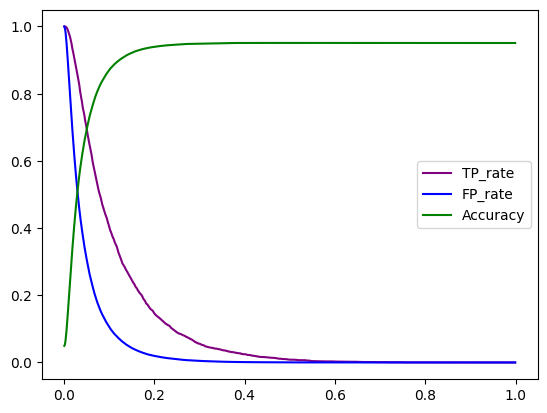

In [22]:
# x-axis: thresholds
# y-axis: TP_rate, FP_rate, and Accuracy
plt.plot(list(eval_neyman_pearson_list.keys()), [eval_neyman_pearson_list[i]['TP_rate'] for i in thresholds], label='TP_rate', color='purple')
plt.plot(list(eval_neyman_pearson_list.keys()), [eval_neyman_pearson_list[i]['FP_rate'] for i in thresholds], label='FP_rate', color='blue')
plt.plot(list(eval_neyman_pearson_list.keys()), [eval_neyman_pearson_list[i]['Accuracy'] for i in thresholds], label='Accuracy', color='green')
# Adding legend and displaying the plot
plt.legend()
plt.show()

### Generating the ROC curve

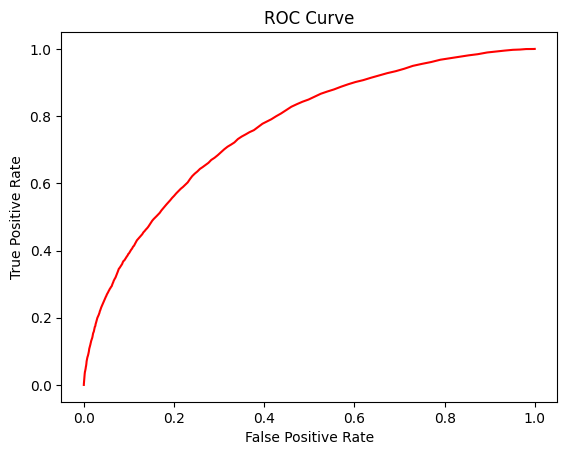

In [23]:
# receiver operating characteristic (ROC) curve is a graphical representation of the performance 
# of a binary classification model, as the discrimination threshold is varied


# The area under the ROC curve (AUC) is a commonly used metric to compare the performance of different classifiers, 
# with a higher AUC indicating better performance

# Extract Tp and Fp values from the eval_neyman_pearson_list dictionary
Tp = [eval_neyman_pearson_list[j]['TP_rate'] for j in thresholds]
Fp = [eval_neyman_pearson_list[j]['FP_rate'] for j in thresholds]

# Plot the ROC curve
plt.plot(Fp, Tp, color = "red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Max-Min Classifier

In [24]:
class max_min_classifier :
    def __init__(self, X, Y, priors, parameters) -> None:
        self.X = X # Store the feature matrix X
        self.Y = Y # Store the target variable Y
        self.priors = priors # Store the prior probabilities of the two classes
        self.parameters = parameters # Store the mean and variance parameters of the two classes

    def normal(self, x, parameter) :
        # Calculate the value of the normal probability density function
        return (1/math.sqrt(2*math.pi*parameter["variance"]))*math.exp(-0.5*(((x-parameter["mean"])/math.sqrt(parameter["variance"]))**2))
    
    def posterior_y1(self, x) :
        # Calculate the posterior probability of class 1 for a given feature vector x
        evidence = self.priors[0]*self.normal(x, self.parameters[0]) + self.priors[1]*self.normal(x, self.parameters[1])
        posterior = self.priors[1]*self.normal(x, self.parameters[1])/evidence
        return posterior
    
    def classifier(self, x, threshold) :
        # Classify a given feature vector x using the specified threshold
        posterior = self.posterior_y1(x) 
        if(posterior>threshold) :
            return 1 # Classify as class 1 if the posterior probability of class 1 is greater than the threshold
        
        return 0 # Classify as class 0 otherwise
    
    def predictions(self, threshold) :
        # Generate the predicted class labels for all feature vectors using the specified threshold
        return [self.classifier(x, threshold) for x in self.X]
    
    def calc_threshold(self, tolerance=0.01, minimum_threshold=0, max_threshold=1, step_threshold=0.01) :
        # Calculate the threshold that minimizes the difference between the false positive rate and false negative rate
        total_Y1 = sum(self.Y) # Calculate the total number of instances in class 1
        total_Y0 = len(self.Y) - total_Y1 # Calculate the total number of instances in class 0

        for threshold in np.arange(minimum_threshold, max_threshold, step_threshold) :
            predicted = self.predictions(threshold) # Generate the predicted class labels using the current threshold
            evaluation = EvalMetrics(predicted, self.Y) # Calculate the evaluation metrics based on the predicted and actual class labels
            if(abs(evaluation.false_positive_rate()*total_Y0/total_Y1 - evaluation.false_negative_rate()*total_Y1/total_Y0)<tolerance) :
                return threshold # Return the threshold if the difference between the false positive rate and false negative rate is within the specified tolerance
            
        print("Threshold Not Found") # Print an error message if the threshold cannot be found
        return None


In [25]:
max_min_class = max_min_classifier([i[0] for i in sample], [i[1] for i in sample], [0.95, 0.05], [parameters0, parameters1])
max_min_threshold = max_min_class.calc_threshold(0.01) 
print(max_min_threshold)
predictions_max_min_classifier = max_min_class.predictions(max_min_threshold)
evaluations = EvalMetrics(predictions_max_min_classifier, [i[1] for i in sample]) 
print("Accuracy: ", evaluations.accuracy())

0.34
Accuracy:  0.95015
